# Programming Assignment

## CNN classifier for the CIFAR-10 dataset

In [2]:
#### PACKAGE IMPORTS ####

# Run this cell first to import all required packages. Do not make any imports elsewhere in the notebook

import tensorflow as tf
from keras.datasets import cifar10
# from keras.utils import to_categorical
# from keras.models import Sequential
# from keras.layers import Conv2D
# from keras.layers import MaxPooling2D
# from keras.layers import Dense
# from keras.layers import Flatten
# from keras.optimizers import SGD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# If you would like to make further imports from Tensorflow, add them here



#### Load and preprocess the data

In [3]:
# Run this cell to load the CIFAR-10First, preprocess the data by scaling the training and test images so their values lie in the range from 0 to 1. data

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

First, preprocess the data by scaling the training and test images so their values lie in the range from 0 to 1.

In [4]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def scale_cifar10_data(train_images, test_images):
    """
    This function takes in the training and test images as loaded in the cell above, and scales them
    so that they have minimum and maximum values equal to 0 and 1 respectively.
    Your function should return a tuple (train_images, test_images) of scaled training and test images.
    """
    train_images = train_images/255
    test_images = test_images/255
    
    return (train_images, test_images)

In [5]:
# Run your function on the input data

scaled_train_images, scaled_test_images = scale_cifar10_data(train_images, test_images)

In [6]:
# Add a dummy channel dimension

# scaled_train_images = scaled_train_images[..., np.newaxis]
# scaled_test_images = scaled_test_images[..., np.newaxis]

#### Build the convolutional neural network model

In [7]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def get_model(input_shape):
    """
    This function should build a Sequential model according to the above specification. Ensure the 
    weights are initialised by providing the input_shape argument in the first layer, given by the
    function argument.
    Your function should return the model.
    """
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    
    return model
   
    

    

In [8]:
# Run your function to get the model

model = get_model(scaled_train_images[0].shape)
scaled_train_images.shape

(50000, 32, 32, 3)

#### Compile the model

You should now compile the model using the `compile` method. To do so, you need to specify an optimizer, a loss function and a metric to judge the performance of your model.

In [24]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def compile_model(model):
    """
    This function takes in the model returned from your get_model function, and compiles it with an optimiser,
    loss function and metric.
    Compile the model using the Adam optimiser (with default settings), the cross-entropy loss function and
    accuracy as the only metric. 
    Your function doesn't need to return anything; the model will be compiled in-place.
    """
    model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

    

In [25]:
# Run your function to compile the model

compile_model(model)

#### Fit the model to the training data

Now you should train the model on the CIFAR-10 dataset, using the model's `fit` method. Set the training to run for 10 epochs, and return the training history to be used for plotting the learning curves.

In [26]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def train_model(model, scaled_train_images, train_labels):
    """
    This function should train the model for 5 epochs on the scaled_train_images and train_labels. 
    Your function should return the training history, as returned by model.fit.
    """
    history = model.fit(x = scaled_train_images, y = train_labels, batch_size = 64, epochs = 10)
    return history

    

  
    

In [27]:
# Run your function to train the model

history = train_model(model, scaled_train_images, train_labels)

Epoch 1/10
782/782 [==============================] - 27s 34ms/step - loss: 0.6171 - accuracy: 0.7815
Epoch 2/10
782/782 [==============================] - 26s 33ms/step - loss: 0.5766 - accuracy: 0.7980
Epoch 3/10
782/782 [==============================] - 26s 34ms/step - loss: 0.5507 - accuracy: 0.8047
Epoch 4/10
782/782 [==============================] - 27s 34ms/step - loss: 0.5170 - accuracy: 0.8163
Epoch 5/10
782/782 [==============================] - 27s 35ms/step - loss: 0.4957 - accuracy: 0.8245
Epoch 6/10
782/782 [==============================] - 30s 38ms/step - loss: 0.4632 - accuracy: 0.8374
Epoch 7/10
782/782 [==============================] - 27s 35ms/step - loss: 0.4359 - accuracy: 0.8455
Epoch 8/10
782/782 [==============================] - 26s 33ms/step - loss: 0.4114 - accuracy: 0.8529
Epoch 9/10
782/782 [==============================] - 27s 35ms/step - loss: 0.3849 - accuracy: 0.8622
Epoch 10/10
782/782 [==============================] - 26s 34ms/step - loss: 0.363

#### Plot the learning curves

We will now plot two graphs:
* Epoch vs accuracy
* Epoch vs loss

We will load the model history into a pandas `DataFrame` and use the `plot` method to output the required graphs.

In [13]:
# Run this cell to load the model history into a pandas DataFrame

frame = pd.DataFrame(history.history)

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy')]

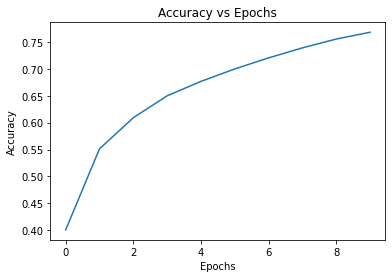

In [14]:
# Run this cell to make the Accuracy vs Epochs plot

acc_plot = frame.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

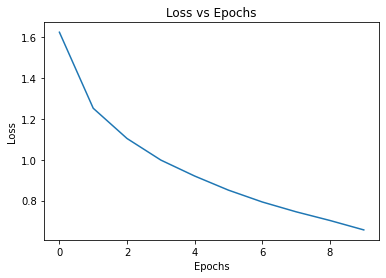

In [15]:
# Run this cell to make the Loss vs Epochs plot

acc_plot = frame.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

#### Evaluate the model

Finally, you should evaluate the performance of your model on the test set, by calling the model's `evaluate` method.

In [16]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def evaluate_model(model, scaled_test_images, test_labels):
    """
    This function should evaluate the model on the scaled_test_images and test_labels. 
    Your function should return a tuple (test_loss, test_accuracy).
    """
    test_loss, test_acc = model.evaluate(scaled_test_images, test_labels)
    return test_loss, test_acc
  

In [17]:
# Run your function to evaluate the model

test_loss, test_accuracy = evaluate_model(model, scaled_test_images, test_labels)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 1s 4ms/step - loss: 0.8534 - accuracy: 0.7116
Test loss: 0.8533803820610046
Test accuracy: 0.7116000056266785


#### Model predictions

Let's see some model predictions! We will randomly select four images from the test data, and display the image and label for each. 

For each test image, model's prediction (the label with maximum probability) is shown, together with a plot showing the model's categorical distribution.

1/1 [==============================] - 0s 85ms/step


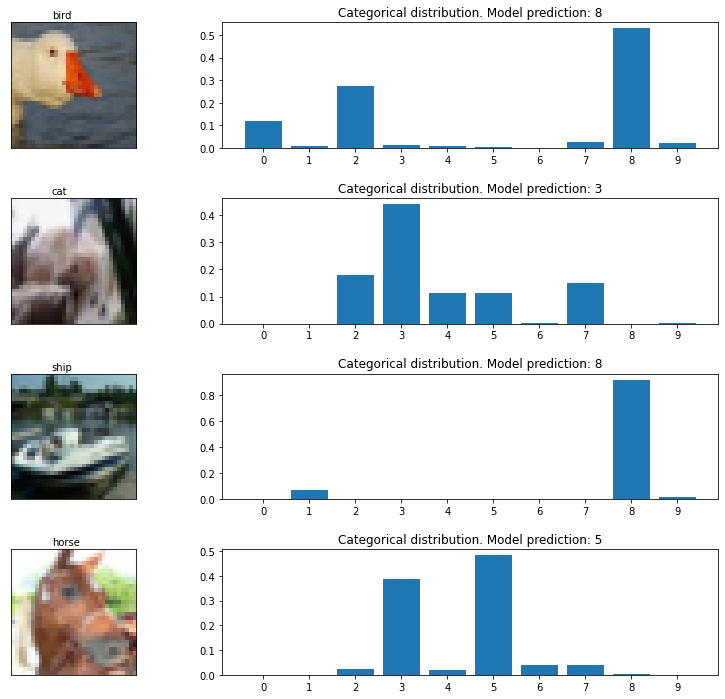

In [18]:
# Run this cell to get model predictions on randomly selected test images

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
num_test_images = scaled_test_images.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = scaled_test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'{class_names[int(label)]}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()

In [19]:
a = ("Orange"),
print(type(a))

<class 'tuple'>
